<h3><center>ECE 49500/59500 Machine Learning<center>
<center>Spring 2020<center>
<h2><center>KNN for iris plant classification<center>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7        

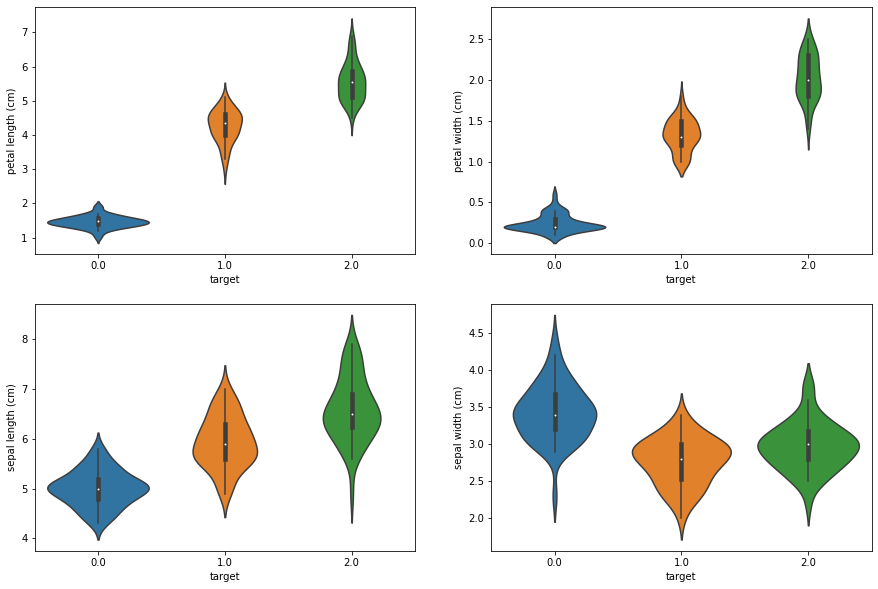

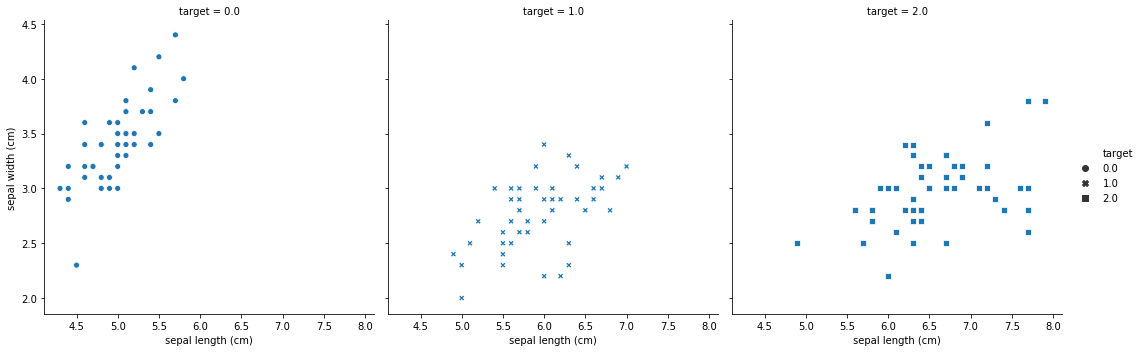

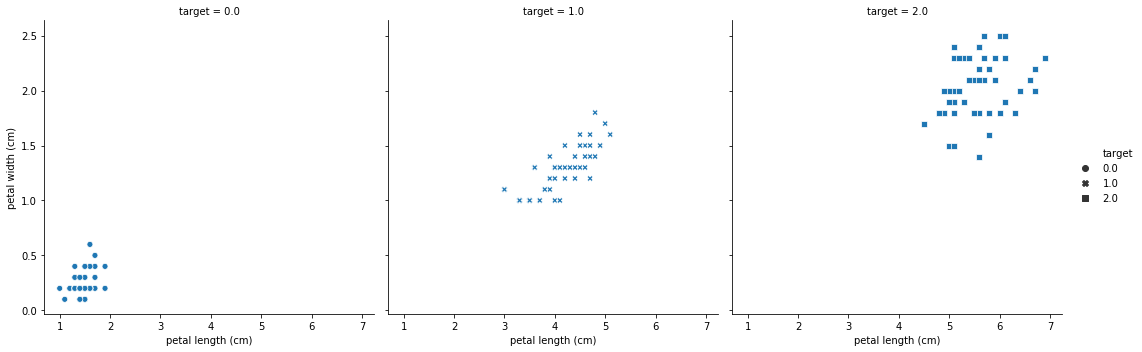

In [10]:
from sklearn import datasets 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
print(df.info())
print(df.head(10))
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='petal length (cm)',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='petal width (cm)',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='sepal length (cm)',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='sepal width (cm)',data=df)

sns.relplot(x='sepal length (cm)', y='sepal width (cm)', data=df, style='target', col='target')
sns.relplot(x='petal length (cm)', y='petal width (cm)', data=df, style='target', col='target')



In [11]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = True, random_state = 0)



In [12]:
import numpy as np
import math
from sklearn import preprocessing
class KNeighborsClassifier1:
    def __init__(self,n_neighbors, weights = 'uniform'):
        self.n_neighbors = n_neighbors
        self.normalized_train = []
        self.y_train = []
        self.distance = []
        self.weights = weights
        
    def get_weights(self,dist, weights):
        if weights == 'uniform':
            return np.ones((dist.shape))
        elif callable(weights):
            return weights(dist)
        else:
             raise ValueError("weights not recognized: should be 'uniform', or a callable function")


    def normalize(self,X):
        minimum = np.amax(X, axis=0)
        maximum = np.amin(X, axis=0)
        normalized = np.empty((X.shape))
        #print(X.shape)
        for i in range(0,X.shape[0]):
            for j in range(0,X.shape[1]):
                normalized[i][j] = (X[i][j] - minimum[j]) / (maximum[j] - minimum[j])
        #print(normalized)
        min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
        normalized = min_max_scaler.fit_transform(X)
        #print(normalized)
        return normalized
        
    def euclidean_distance(self,x1, x2):
        distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x1, x2)]))                
        return distance
    def fit(self,X_train, y_train):
        self.normalized_train = self.normalize(X_train)
        self.y_train = y_train                           
    def predict(self,X_test):
        y_pred = np.empty(X_test.shape[0])
        distance = np.empty((X_test.shape[0],self.normalized_train.shape[0]))
        distance_index = np.empty((X_test.shape[0],self.normalized_train.shape[0]))
        normalized_test = self.normalize(X_test)
        for i in range(0,X_test.shape[0]):
            for j in range(0,self.normalized_train.shape[0]):
                distance[i][j] = self.euclidean_distance(X_test[i],X_train[j]) 
            distance_index[i] = np.argsort(distance[i])
        distance_index = distance_index.astype(int)
        #print(distance)
        category = np.unique(y_train)
        #print(category)
        dist = np.empty((X_test.shape[0],self.n_neighbors))
        for i in range(0, X_test.shape[0]):
            for j in range(0,self.n_neighbors):
                dist[i][j] = distance[i][distance_index[i][j]] 
        weights = self.get_weights(dist, self.weights)
        #print(weights)
        for i in range(0, X_test.shape[0]):
            temp = np.zeros((category.shape[0]))
            for j in range(0,self.n_neighbors):
                for k in range(0, category.shape[0]):
                    if self.y_train[distance_index[i][j]] == category[k]:
                        temp[k] += weights[i][j]
                    
            #print(temp)
            temp = np.argsort(temp)
            y_pred[i] = temp[category.shape[0] - 1]
#             print(y_pred[i])
        return y_pred
    
            
            
                             
        
        

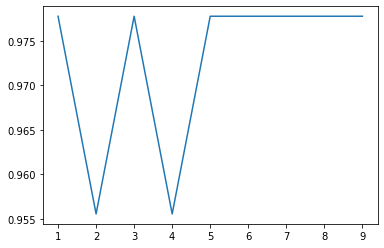

In [13]:
from sklearn import metrics
k_range = range(1,10)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier1(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range, scores_list)




In [14]:
from sklearn.metrics import confusion_matrix
def weight1(dist):
    weights = np.zeros((dist.shape))
    for i in range(0, dist.shape[0]):
        for j in range(0, dist.shape[1]):
            if dist[i][j] != 0:
                weights[i][j] = 1 / dist[i][j]
    return weights
def weight2(dist):
    weights = np.zeros((dist.shape))
    for i in range(0, dist.shape[0]):
        for j in range(0, dist.shape[1]):
            if dist[i][j] != 0:
                weights[i][j] = 1 / (dist[i][j] ** 2)
    return weights
knn1 = KNeighborsClassifier1(n_neighbors = 5, weights = 'uniform')
knn1.fit(X_train,y_train)
knn2 = KNeighborsClassifier1(n_neighbors = 5, weights = weight1)
knn2.fit(X_train,y_train)
knn3 = KNeighborsClassifier1(n_neighbors = 5, weights = weight2)
knn3.fit(X_train,y_train)
y_pred1 = knn1.predict(X_test)
y_pred2 = knn2.predict(X_test)
y_pred3 = knn3.predict(X_test)
acc1 = 0
acc2 = 0
acc3 = 0
for i in range(0,y_test.shape[0]):
    if y_pred1[i] == y_test[i]:
        acc1 += 1
    if y_pred2[i] == y_test[i]:
        acc2 += 1
    if y_pred3[i] == y_test[i]:
        acc3 += 1
acc1 /= y_test.shape[0]
acc2 /= y_test.shape[0]
acc3 /= y_test.shape[0]
print(acc1)
print(confusion_matrix(y_pred1,y_test))
print(acc2)
print(confusion_matrix(y_pred2,y_test))
print(acc3)
print(confusion_matrix(y_pred3,y_test))




0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
